# Laboratorium 1


### Konfiguracja

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [8]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

In [ ]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [6]:
from math import pi,cos,sin
from random import seed,random

def randomFirst(n):
    points = []
    seed(1)
    for i in range(0,n):
        points.append((-1000+random()*2000,-1000+random()*2000))
    return points
def randomSecond(n):
    points = []
    seed(1)
    for i in range(0,n):
        points.append((-10**14+random()*2*10**14,-10**14+random()*2*10**14))
    return points
def randomThird(n):
    points = []
    seed(1)
    for i in range(0,n):
        angle = 2*pi*random()
        points.append((cos(angle)*100,sin(angle)*100))
    return points
def randomFourth(n):
    a = 0.05
    b = 0.05                  # y=ax+b
    points = []
    seed(1)
    for i in range(0,n):
        x = -1000+random()*2000
        points.append((x,a*x+b))
    return points

points1=randomFirst(10**5)
points2=randomSecond(10**5)
points3=randomThird(10**3)
points4=randomFourth(10**3)

In [5]:
def dividePointsFirst(points,eps):
    a = (-1.0,0.0)
    b = (1.0, 0.1)
    left = []
    right = []
    middle = []
    placed = []
    l = r = m = 0
    for point in points:
        det = a[0]*b[1]+a[1]*point[0]+b[0]*point[1]-b[1]*point[0]-a[0]*point[1]-a[1]*b[0]
        if det > eps:
            left.append(point)
            l += 1
            placed.append(1)
        elif det < -eps:
            right.append(point)
            r += 1
            placed.append(-1)
        else:
            middle.append(point)
            m += 1
            placed.append(0)
    print("Method 1: The number of points in list LEFT is {}, in list RIGHT is {} and in list MIDDLE is {}".format(l,r,m))
    %matplotlib notebook
    plot = Plot([PointsCollection(left, color = 'green'),
                  PointsCollection(right, color = 'blue'),
                  PointsCollection(middle, color = 'red')])
    plot.draw()
    return placed

In [4]:
def dividePointsSecond(points, eps):
    a = (-1.0,0.0)
    b = (1.0, 0.1)
    left = []
    right = []
    middle = []
    placed = []
    l = r = m = 0
    for point in points:
        det = (a[0]-point[0])*(b[1]-point[1])-(b[0]-point[0])*(a[1]-point[1])
        if det > eps:
            left.append(point)
            l += 1
            placed.append(1)
        elif det < -eps:
            right.append(point)
            r += 1
            placed.append(-1)
        else:
            middle.append(point)
            m += 1
            placed.append(0)
    print("Method 2: The number of points in list LEFT is {}, in list RIGHT is {} and in list MIDDLE is {}".format(l,r,m))
    %matplotlib notebook
    plot = Plot([PointsCollection(left, color = 'green'),
                  PointsCollection(right, color = 'blue'),
                  PointsCollection(middle, color = 'red')])
    plot.draw()
    return placed

In [13]:
def dividePointsThird(points,eps):
    left = []
    right = []
    middle = []
    placed = []
    l = r = m = 0
    for point in points:
        a = np.array([[-1,0,1],[1,0.1,1],[point[0],point[1],1]])
        det = np.linalg.det(a)
        if det > eps:
            left.append(point)
            l += 1
            placed.append(1)
        elif det < -eps:
            right.append(point)
            r += 1
            placed.append(-1)
        else:
            middle.append(point)
            m += 1
            placed.append(0)
    print("Method 3: The number of points in list LEFT is {}, in list RIGHT is {} and in list MIDDLE is {}".format(l,r,m))
    %matplotlib notebook
    plot = Plot([PointsCollection(left, color = 'green'),
                  PointsCollection(right, color = 'blue'),
                  PointsCollection(middle, color = 'red')])
    plot.draw()
    return placed

In [14]:
def dividePointsFourth(points,eps):
    left = []
    right = []
    middle = []
    placed = []
    l = r = m = 0
    for point in points:
        a = np.array([[-1.0-point[0],0-point[1]],[1.0-point[0],0.1-point[1]]])
        det=np.linalg.det(a)
        if det > eps:
            left.append(point)
            l += 1
            placed.append(1)
        elif det < -eps:
            right.append(point)
            r += 1
            placed.append(-1)
        else:
            middle.append(point)
            m += 1
            placed.append(0)
    print("Method 4: The number of points in list LEFT is {}, in list RIGHT is {} and in list MIDDLE is {}".format(l,r,m))
    %matplotlib notebook
    plot = Plot([PointsCollection(left, color = 'green'),
                  PointsCollection(right, color = 'blue'),
                  PointsCollection(middle, color = 'red')])
    plot.draw()
    return placed

In [9]:
def calculateDiff(result1, result2,a,b):
    j = 0
    for i in range(0,len(result1)):
        if result1[i] != result2[i]:
            j += 1
    print("The number of points that were placed different between method {} and method {} is {} ".format(a,b,j))

First collection of points


<IPython.core.display.Javascript object>


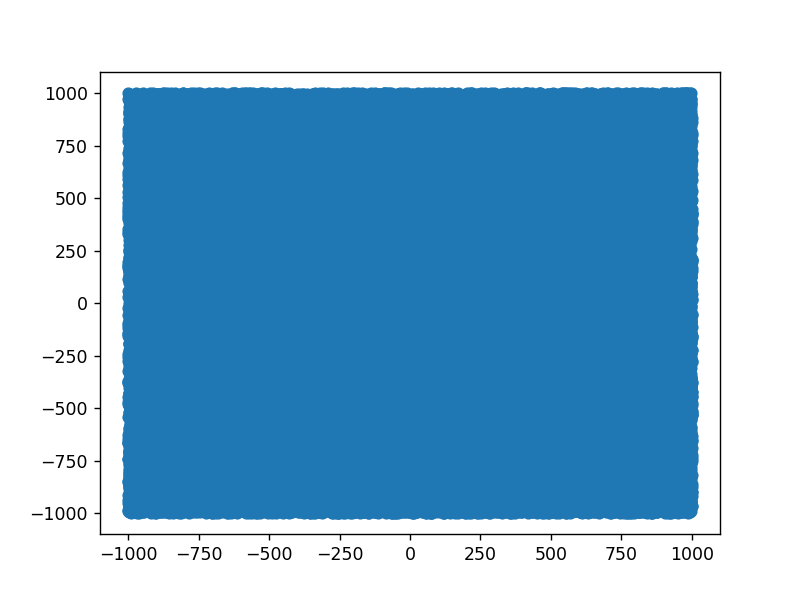

In [9]:
print("First collection of points")
%matplotlib notebook

plot = Plot([PointsCollection(points1)])
plot.draw()

Second collection of points


<IPython.core.display.Javascript object>


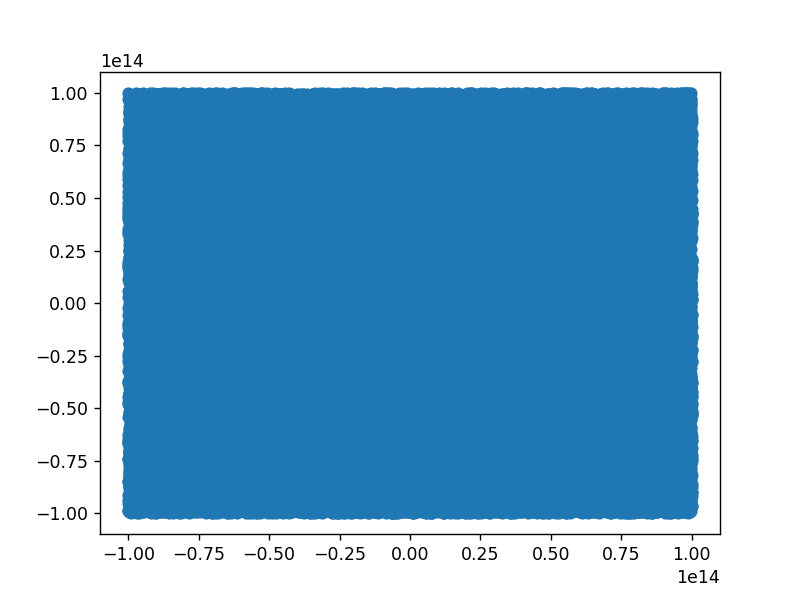

In [11]:
print("Second collection of points")
%matplotlib notebook

plot = Plot([PointsCollection(points2)])
plot.draw()

Third collection of points


<IPython.core.display.Javascript object>


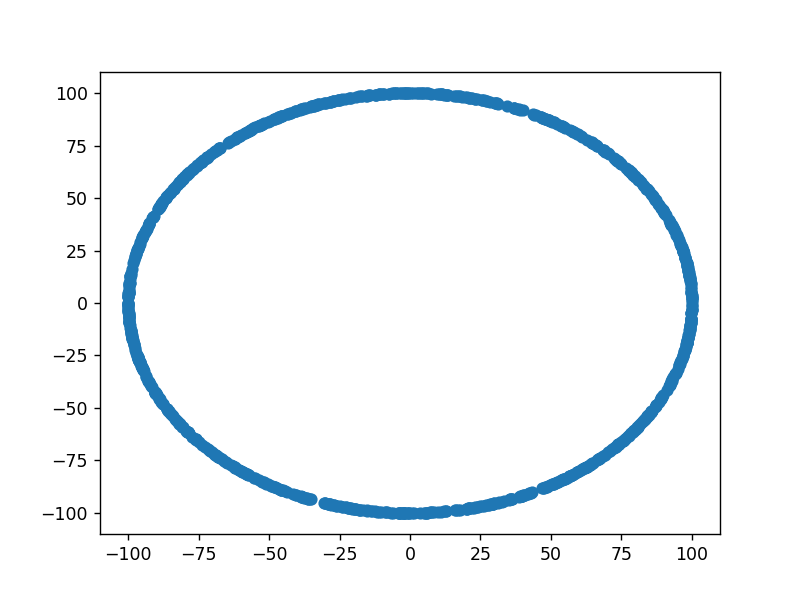

In [12]:
print("Third collection of points")
%matplotlib notebook

plot = Plot([PointsCollection(points3)])
plot.draw()

Fourth collection of points


<IPython.core.display.Javascript object>


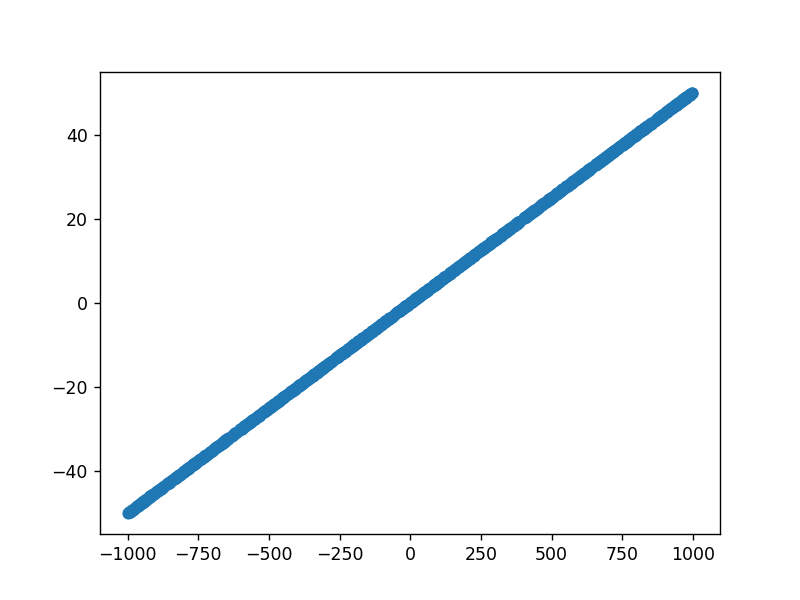

In [14]:
print("Fourth collection of points")
%matplotlib notebook

plot = Plot([PointsCollection(points4)])
plot.draw()

Now results for epsilon = 0
Method 1: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


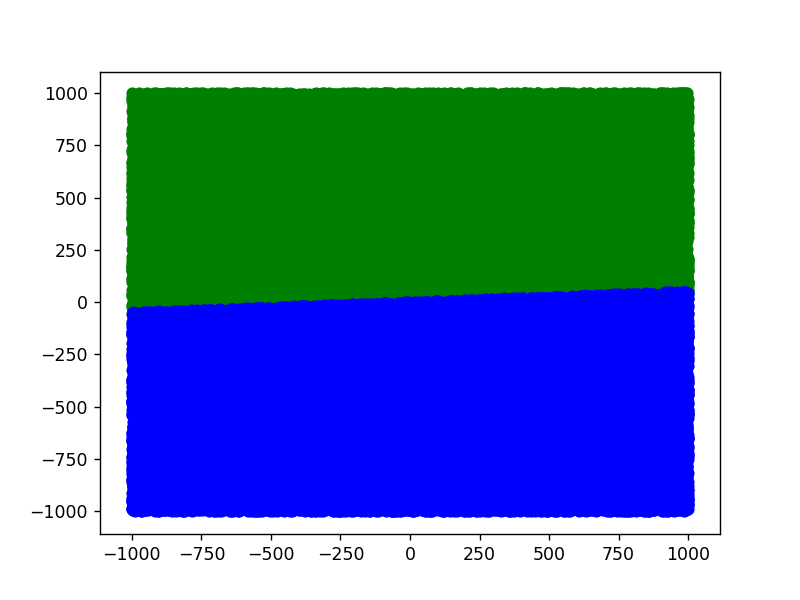

In [25]:
print("Now results for epsilon = 0")
result1 = dividePointsFirst(points1,0)

Now results for epsilon = 0
Method 2: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


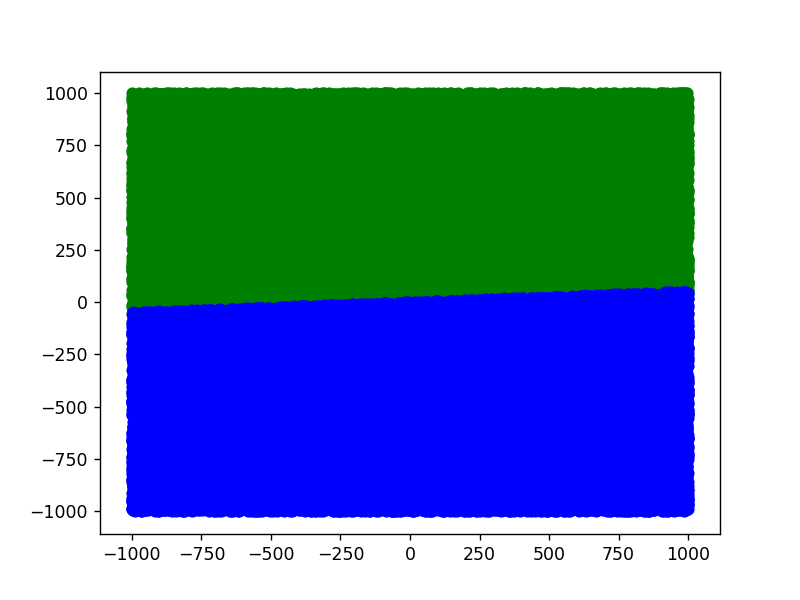

In [26]:
print("Now results for epsilon = 0")
result2 = dividePointsSecond(points1,0)

Now results for epsilon = 0
Method 3: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


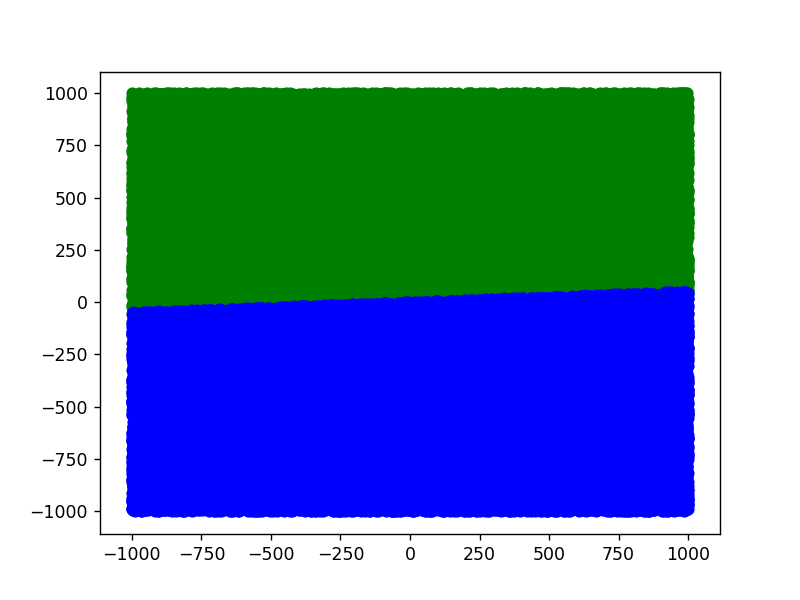

In [15]:
print("Now results for epsilon = 0")
result3 = dividePointsThird(points1,0)

Now results for epsilon = 0
Method 4: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


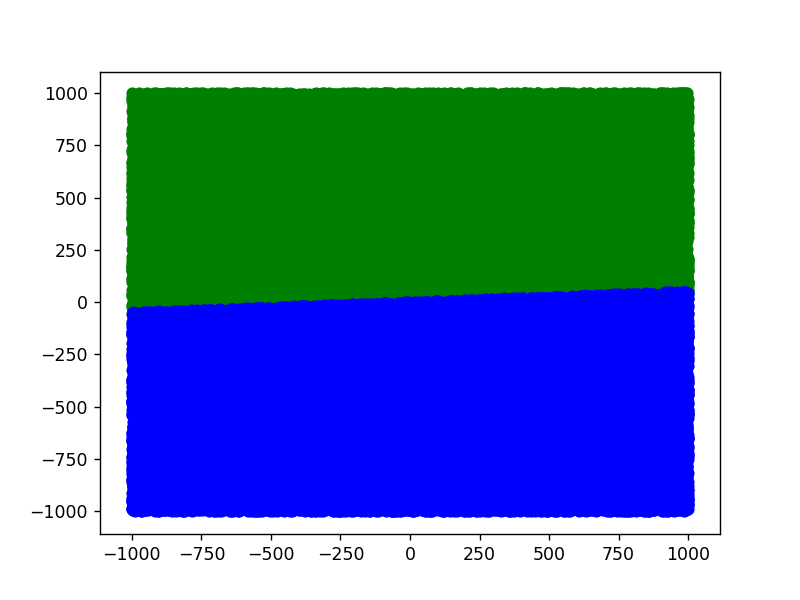

In [16]:
print("Now results for epsilon = 0")
result4 = dividePointsFourth(points1,0)

In [29]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 0
Method 1: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


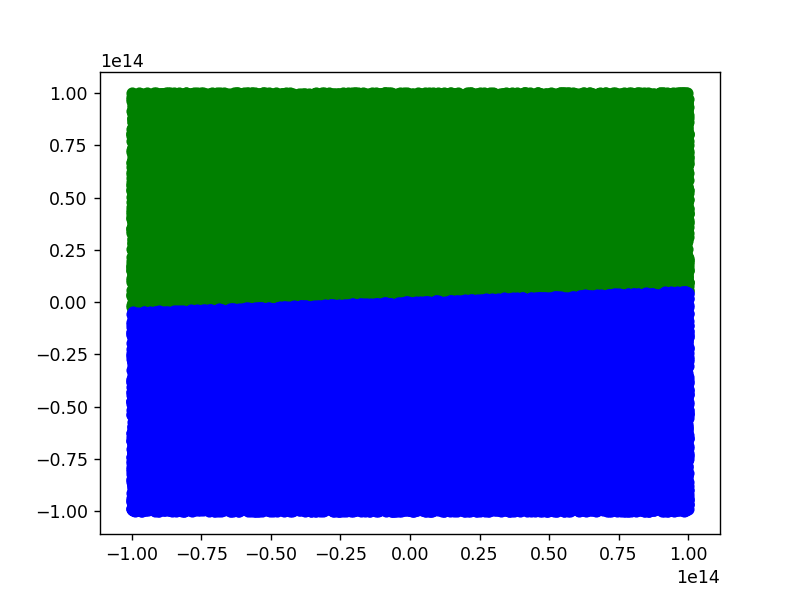

In [30]:
print("Now results for epsilon = 0")
result1 = dividePointsFirst(points2,0)

Now results for epsilon = 0
Method 2: The number of points in list LEFT is 50101, in list RIGHT is 49892 and in list MIDDLE is 7


<IPython.core.display.Javascript object>


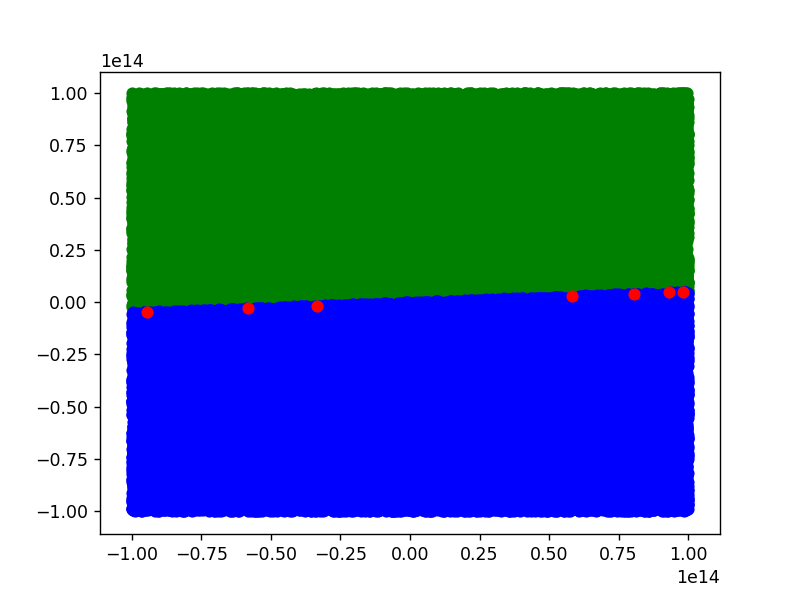

In [31]:
print("Now results for epsilon = 0")
result2 = dividePointsSecond(points2,0)

Now results for epsilon = 0
Method 3: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


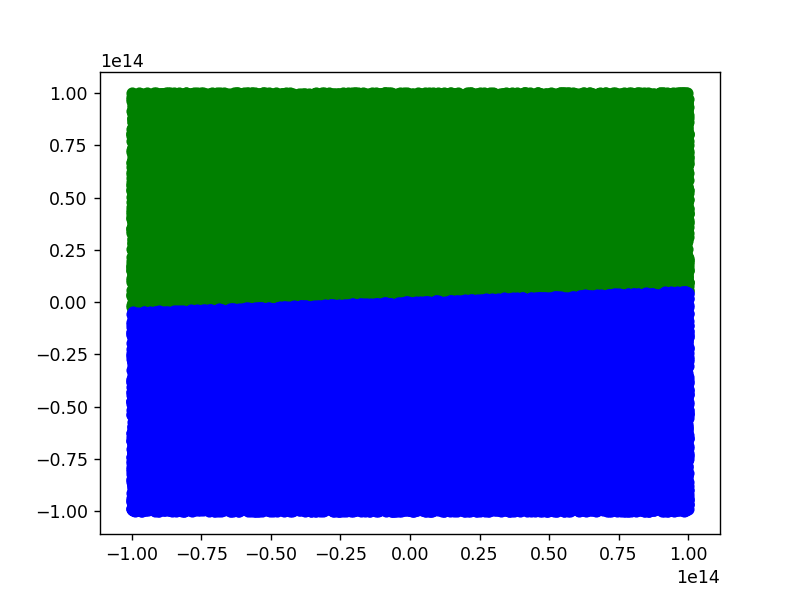

In [17]:
print("Now results for epsilon = 0")
result3 = dividePointsThird(points2,0)

Now results for epsilon = 0
Method 4: The number of points in list LEFT is 50102, in list RIGHT is 49898 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


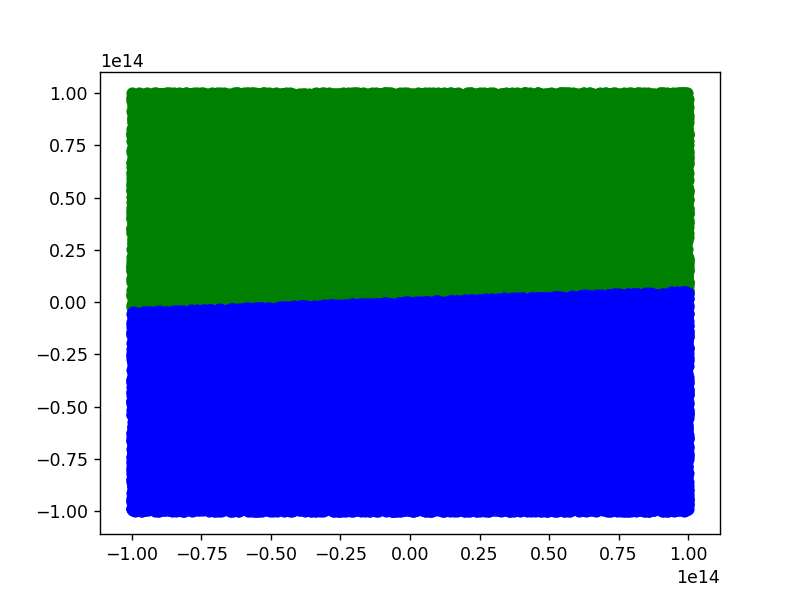

In [18]:
print("Now results for epsilon = 0")
result4 = dividePointsFourth(points2,0)

In [34]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 8 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 5 
The number of points that were placed different between method 2 and method 3 is 8 
The number of points that were placed different between method 2 and method 4 is 8 
The number of points that were placed different between method 3 and method 4 is 5 


Now results for epsilon = 0
Method 1: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


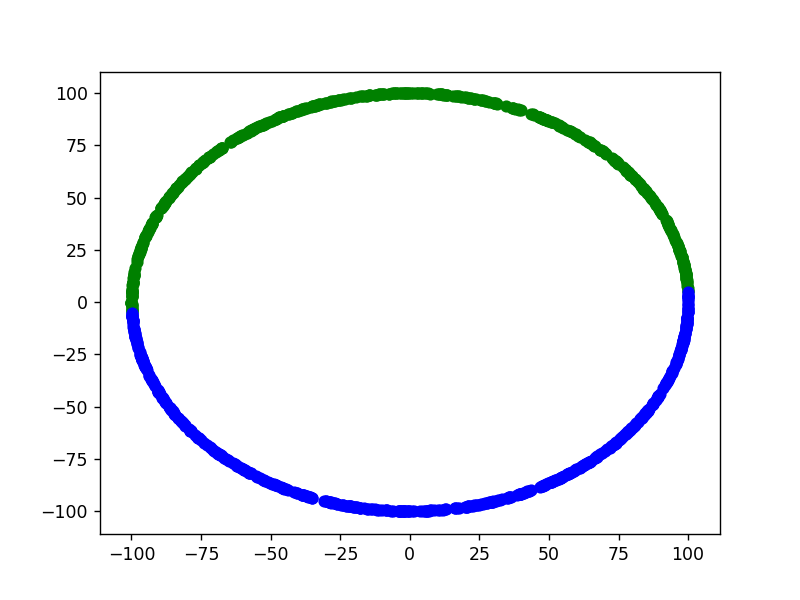

In [35]:
print("Now results for epsilon = 0")
result1 = dividePointsFirst(points3,0)

Now results for epsilon = 0
Method 2: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


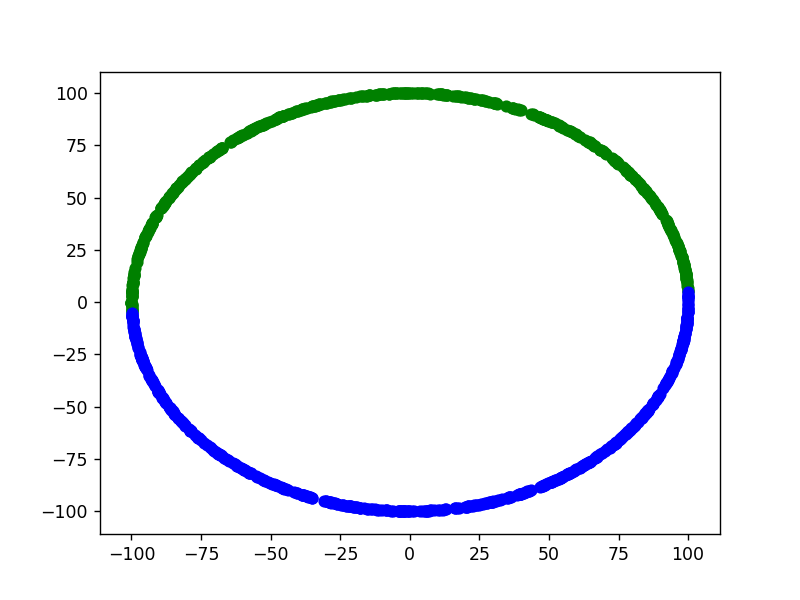

In [36]:
print("Now results for epsilon = 0")
result2 = dividePointsSecond(points3,0)

Now results for epsilon = 0
Method 3: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


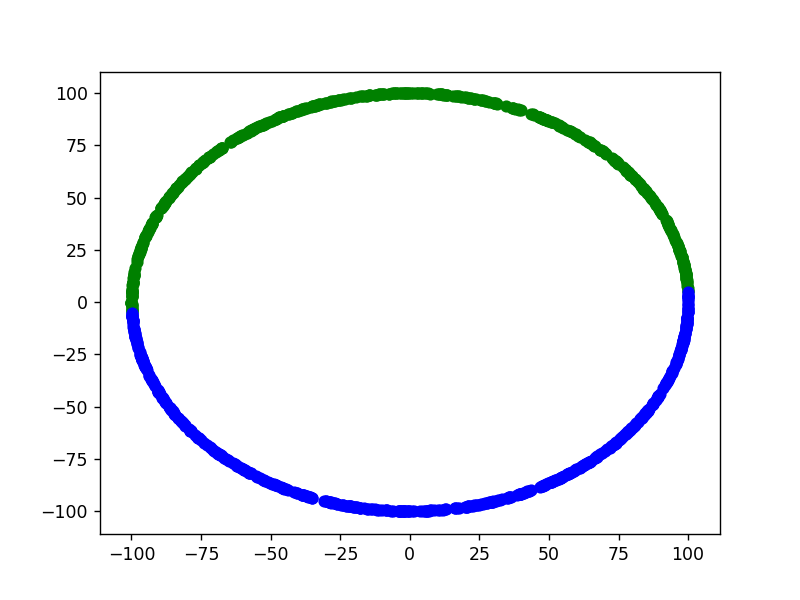

In [19]:
print("Now results for epsilon = 0")
result3 = dividePointsThird(points3,0)

Now results for epsilon = 0
Method 4: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


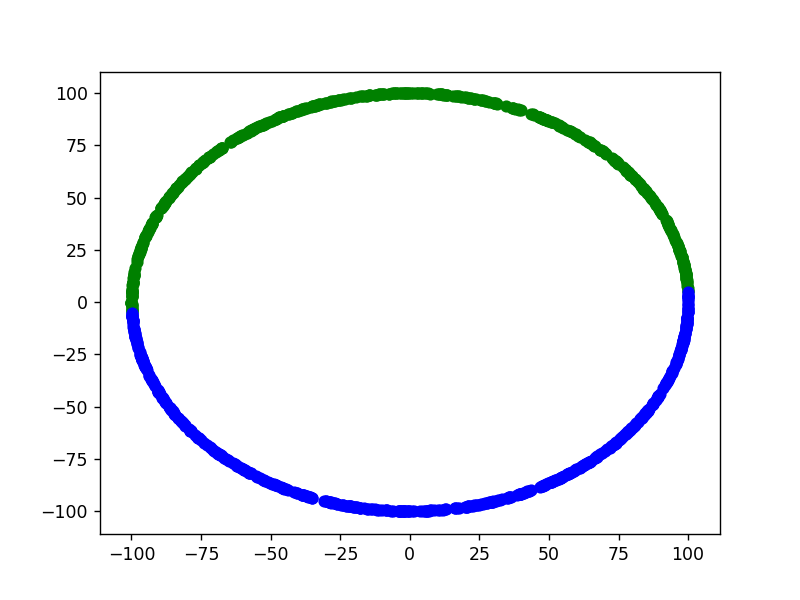

In [20]:
print("Now results for epsilon = 0")
result4 = dividePointsFourth(points3,0)

In [39]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 0
Method 1: The number of points in list LEFT is 171, in list RIGHT is 402 and in list MIDDLE is 427


<IPython.core.display.Javascript object>


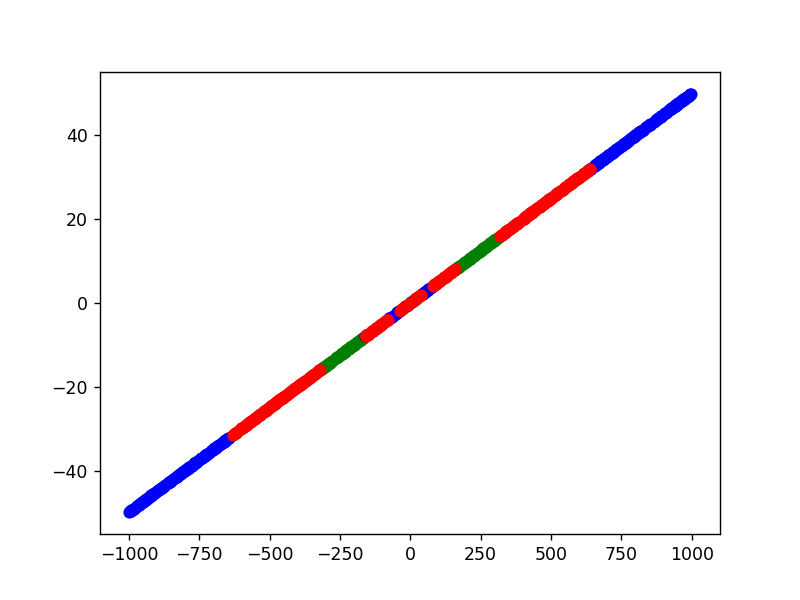

In [40]:
print("Now results for epsilon = 0")
result1 = dividePointsFirst(points4,0)

Now results for epsilon = 0
Method 2: The number of points in list LEFT is 149, in list RIGHT is 158 and in list MIDDLE is 693


<IPython.core.display.Javascript object>


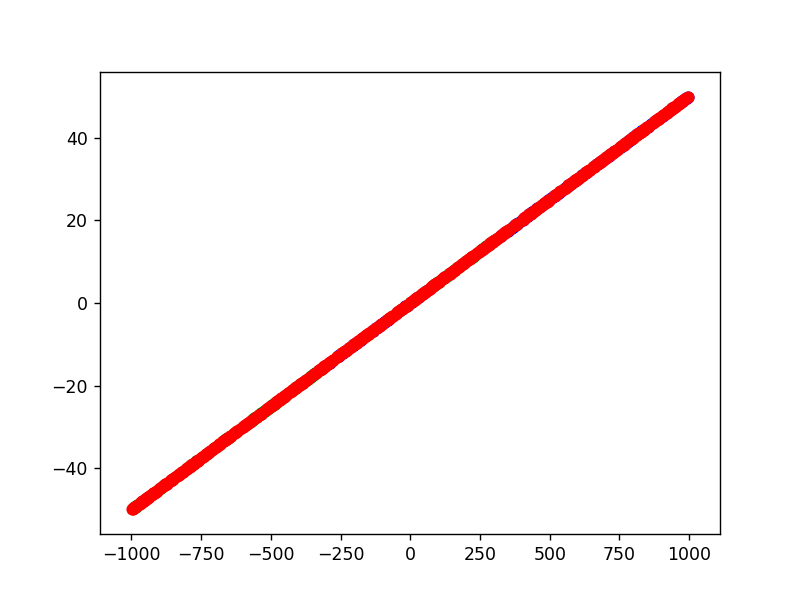

In [41]:
print("Now results for epsilon = 0")
result2 = dividePointsSecond(points4,0)

Now results for epsilon = 0
Method 3: The number of points in list LEFT is 464, in list RIGHT is 534 and in list MIDDLE is 2


<IPython.core.display.Javascript object>


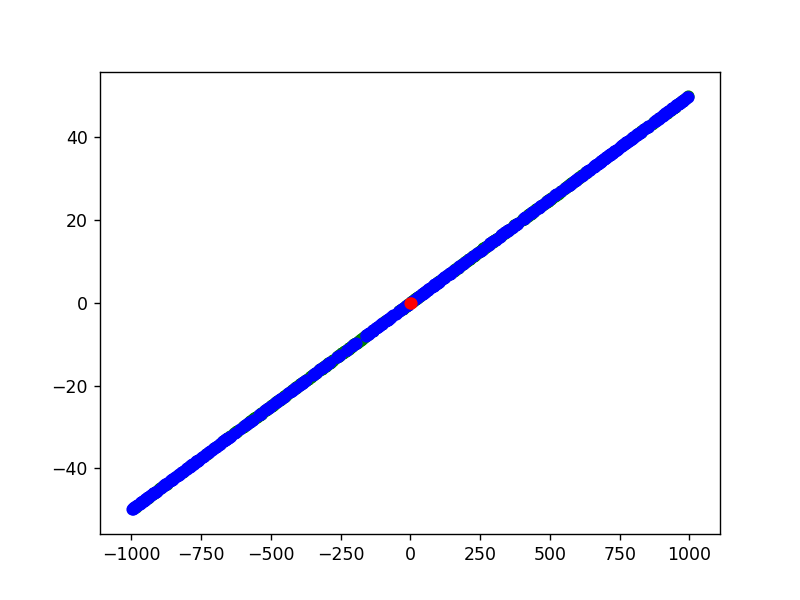

In [21]:
print("Now results for epsilon = 0")
result3 = dividePointsThird(points4,0)

Now results for epsilon = 0
Method 4: The number of points in list LEFT is 481, in list RIGHT is 519 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


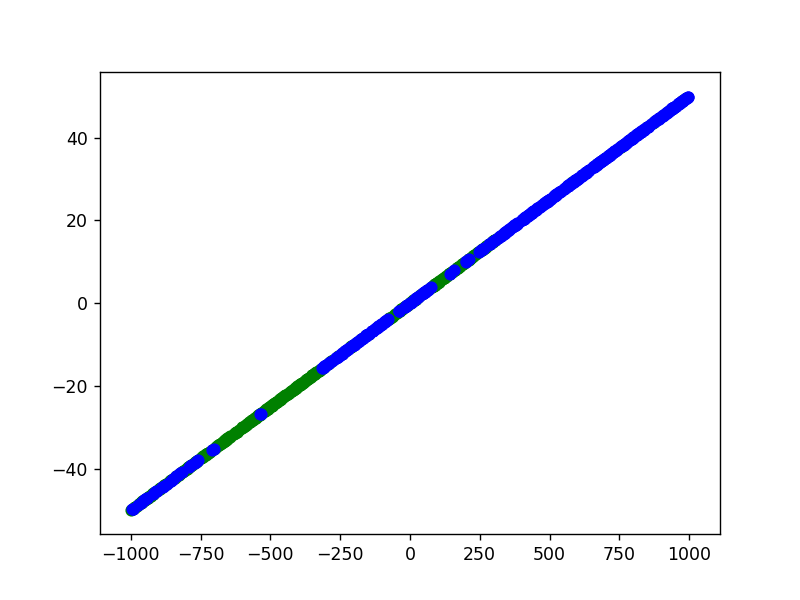

In [22]:
print("Now results for epsilon = 0")
result4 = dividePointsFourth(points4,0)

In [44]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 656 
The number of points that were placed different between method 1 and method 3 is 553 
The number of points that were placed different between method 1 and method 4 is 693 
The number of points that were placed different between method 2 and method 3 is 834 
The number of points that were placed different between method 2 and method 4 is 717 
The number of points that were placed different between method 3 and method 4 is 466 


Now results for epsilon = 1e-13
Method 1: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


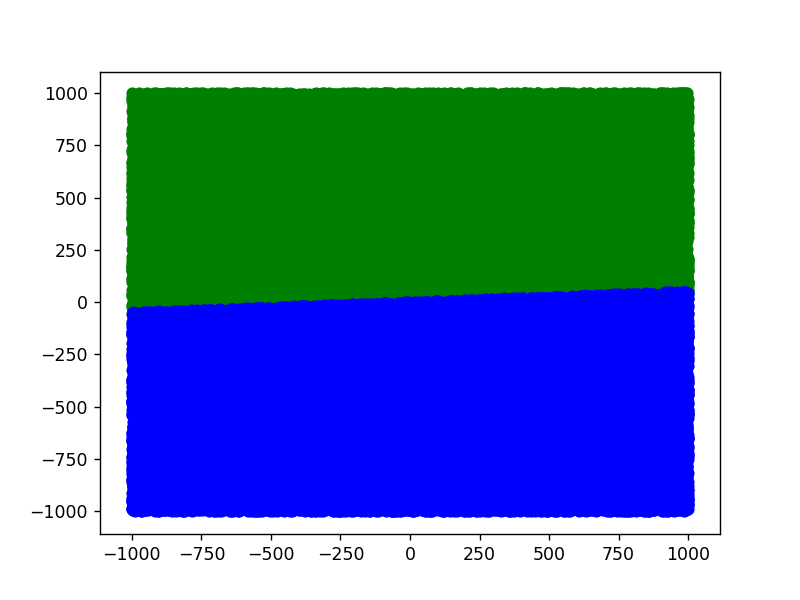

In [46]:
print("Now results for epsilon = 1e-13")
result1 = dividePointsFirst(points1,1e-13)

Now results for epsilon = 1e-13
Method 2: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


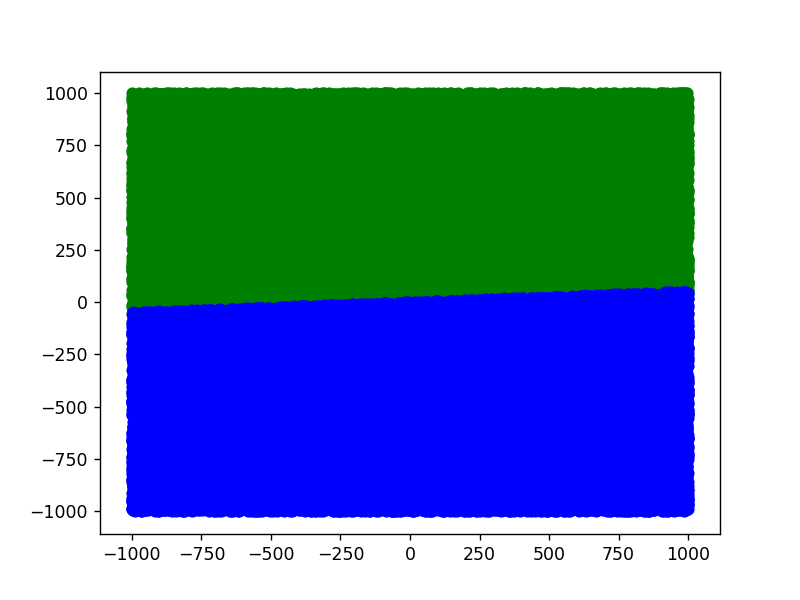

In [47]:
print("Now results for epsilon = 1e-13")
result2 = dividePointsSecond(points1,1e-13)

Now results for epsilon = 1e-13
Method 3: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


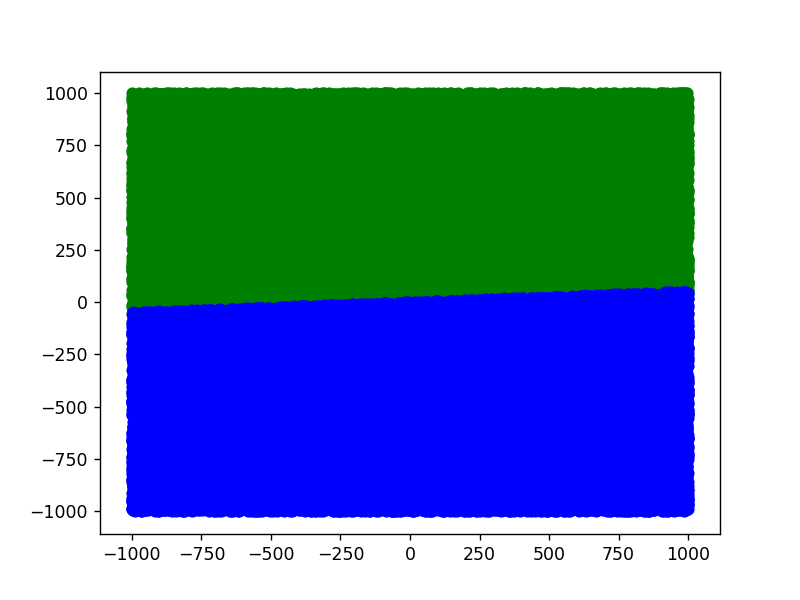

In [23]:
print("Now results for epsilon = 1e-13")
result3 = dividePointsThird(points1,1e-13)

Now results for epsilon = 1e-13
Method 4: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


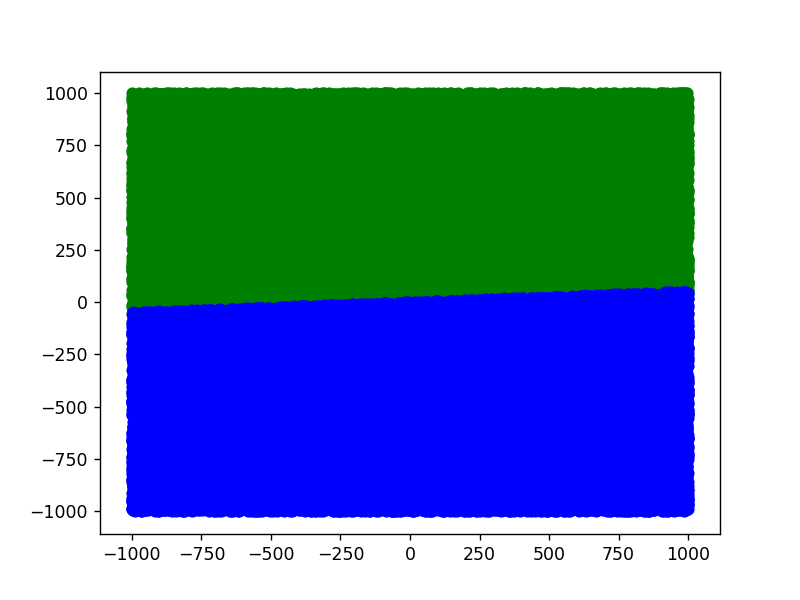

In [24]:
print("Now results for epsilon = 1e-13")
result4 = dividePointsFourth(points1,1e-13)

In [51]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 1e-13
Method 1: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


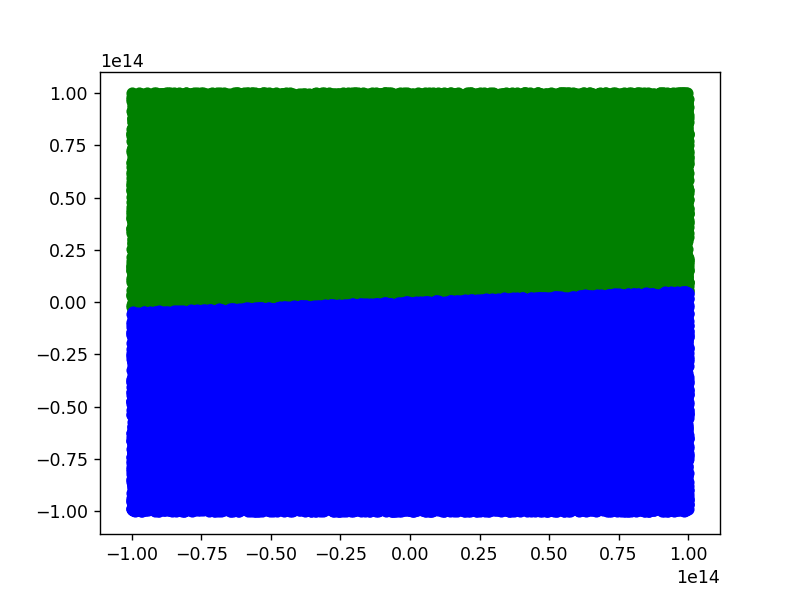

In [52]:
print("Now results for epsilon = 1e-13")
result1 = dividePointsFirst(points2,1e-13)

Now results for epsilon = 1e-13
Method 2: The number of points in list LEFT is 50101, in list RIGHT is 49892 and in list MIDDLE is 7


<IPython.core.display.Javascript object>


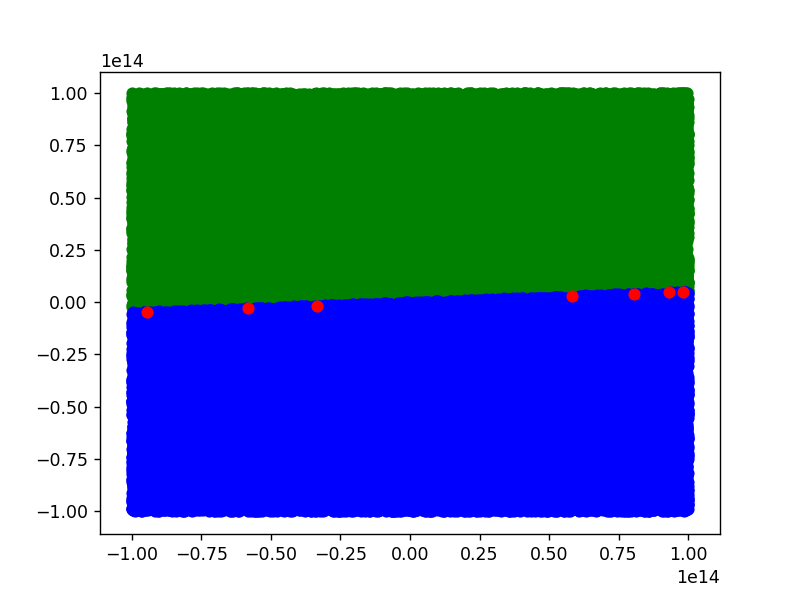

In [11]:
print("Now results for epsilon = 1e-13")
result2 = dividePointsSecond(points2,1e-13)

Now results for epsilon = 1e-13
Method 3: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


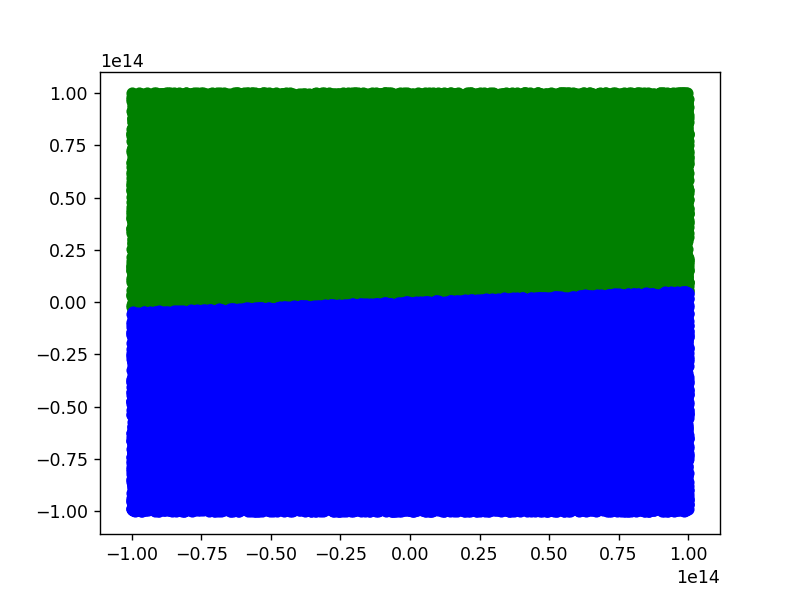

In [25]:
print("Now results for epsilon = 1e-13")
result3 = dividePointsThird(points2,1e-13)

Now results for epsilon = 1e-13
Method 4: The number of points in list LEFT is 50102, in list RIGHT is 49898 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


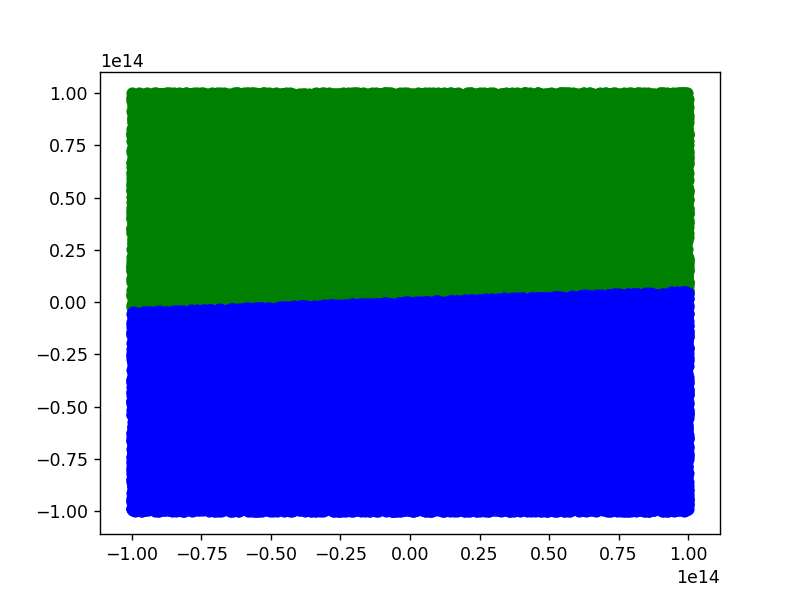

In [26]:
print("Now results for epsilon = 1e-13")
result4 = dividePointsFourth(points2,1e-13)

In [56]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 8 
The number of points that were placed different between method 1 and method 3 is 4 
The number of points that were placed different between method 1 and method 4 is 4 
The number of points that were placed different between method 2 and method 3 is 9 
The number of points that were placed different between method 2 and method 4 is 9 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 1e-13
Method 1: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


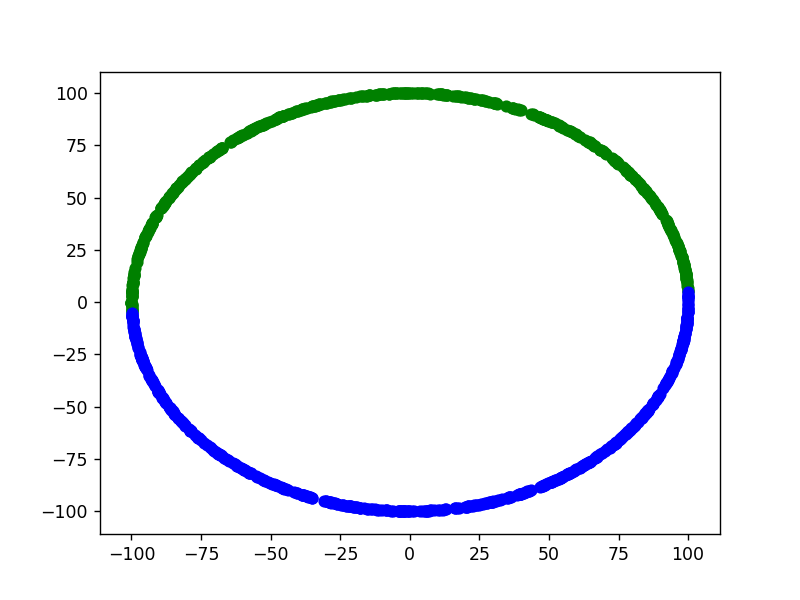

In [57]:
print("Now results for epsilon = 1e-13")
result1 = dividePointsFirst(points3,1e-13)

Now results for epsilon = 1e-13
Method 2: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


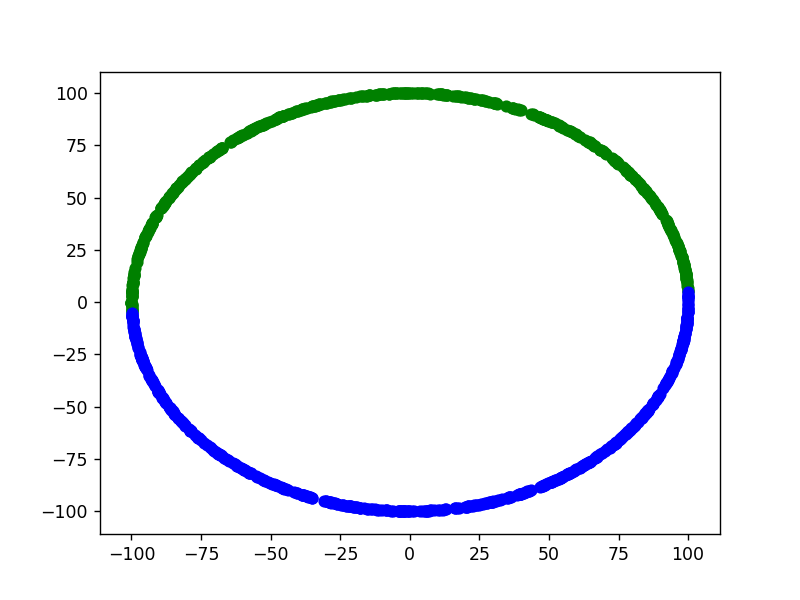

In [58]:
print("Now results for epsilon = 1e-13")
result2 = dividePointsSecond(points3,1e-13)

Now results for epsilon = 1e-13
Method 3: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


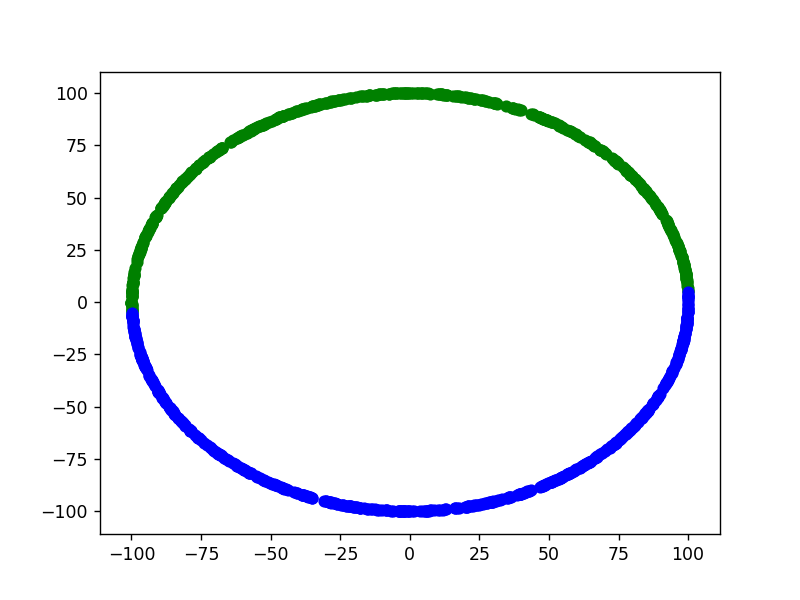

In [27]:
print("Now results for epsilon = 1e-13")
result3 = dividePointsThird(points3,1e-13)

Now results for epsilon = 1e-13
Method 4: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


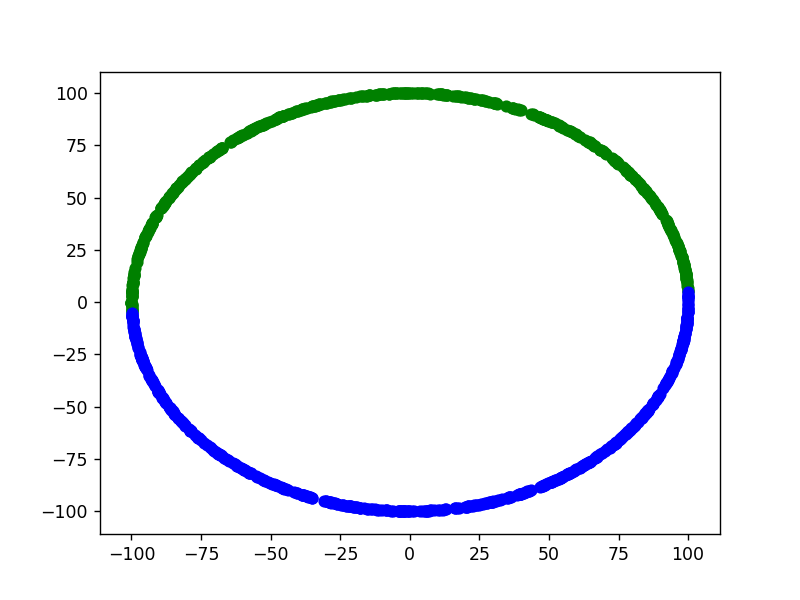

In [28]:
print("Now results for epsilon = 1e-13")
result4 = dividePointsFourth(points3,1e-13)

In [62]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 1e-13
Method 1: The number of points in list LEFT is 0, in list RIGHT is 0 and in list MIDDLE is 1000


<IPython.core.display.Javascript object>


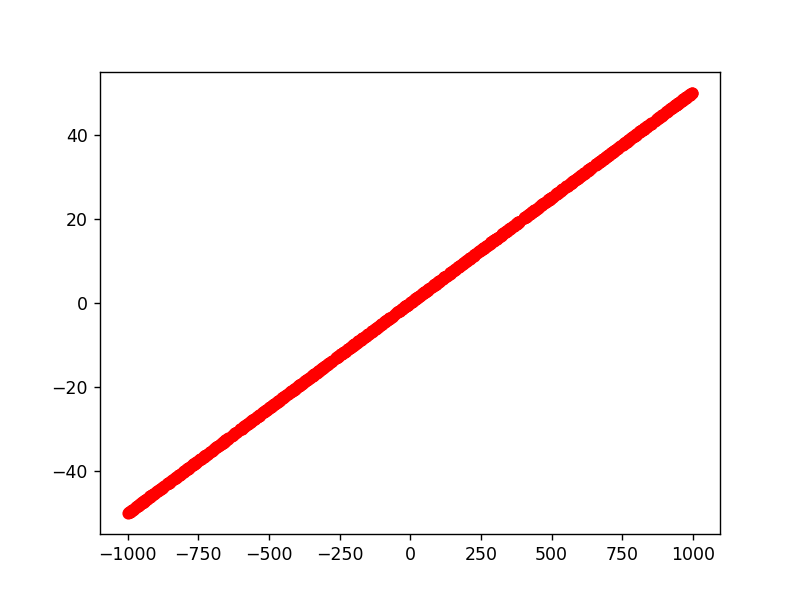

In [63]:
print("Now results for epsilon = 1e-13")
result1 = dividePointsFirst(points4,1e-13)

Now results for epsilon = 1e-13
Method 2: The number of points in list LEFT is 130, in list RIGHT is 141 and in list MIDDLE is 729


<IPython.core.display.Javascript object>


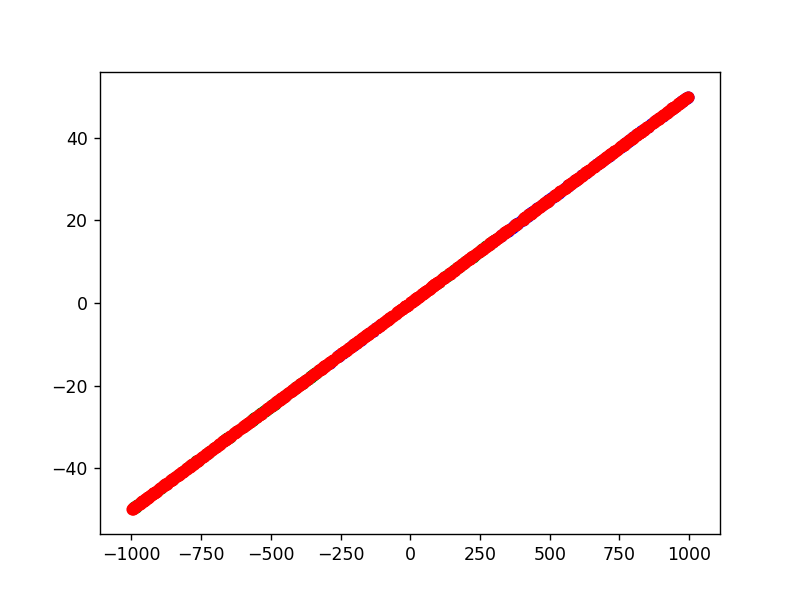

In [66]:
print("Now results for epsilon = 1e-13")
result2 = dividePointsSecond(points4,1e-13)

Now results for epsilon = 1e-13
Method 3: The number of points in list LEFT is 0, in list RIGHT is 0 and in list MIDDLE is 1000


<IPython.core.display.Javascript object>


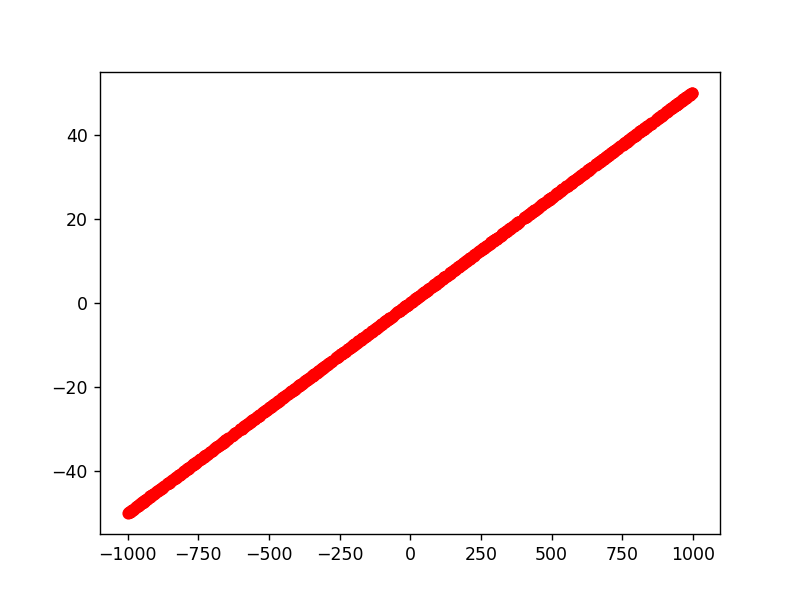

In [29]:
print("Now results for epsilon = 1e-13")
result3 = dividePointsThird(points4,1e-13)

Now results for epsilon = 1e-13
Method 4: The number of points in list LEFT is 326, in list RIGHT is 383 and in list MIDDLE is 291


<IPython.core.display.Javascript object>


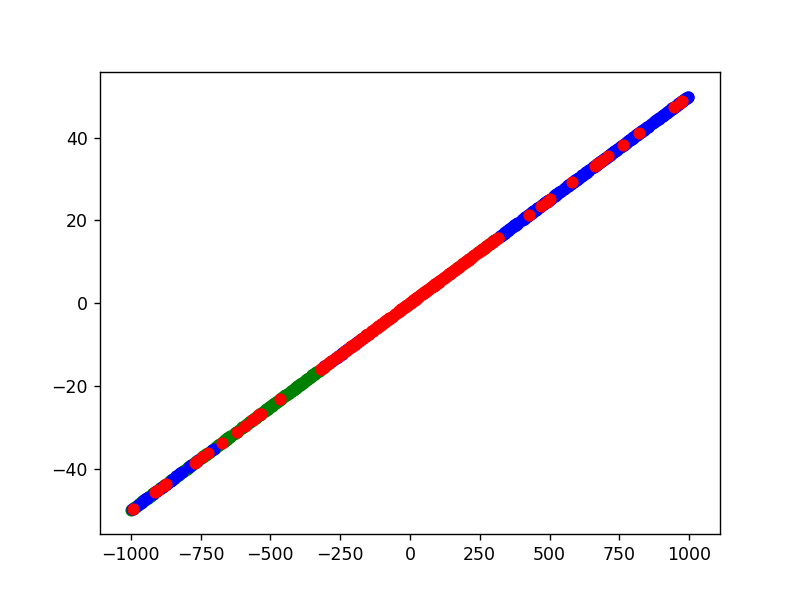

In [30]:
print("Now results for epsilon = 1e-13")
result4 = dividePointsFourth(points4,1e-13)

In [68]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 271 
The number of points that were placed different between method 1 and method 3 is 1000 
The number of points that were placed different between method 1 and method 4 is 1000 
The number of points that were placed different between method 2 and method 3 is 859 
The number of points that were placed different between method 2 and method 4 is 767 
The number of points that were placed different between method 3 and method 4 is 326 


Now results for epsilon = 1e-20
Method 1: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


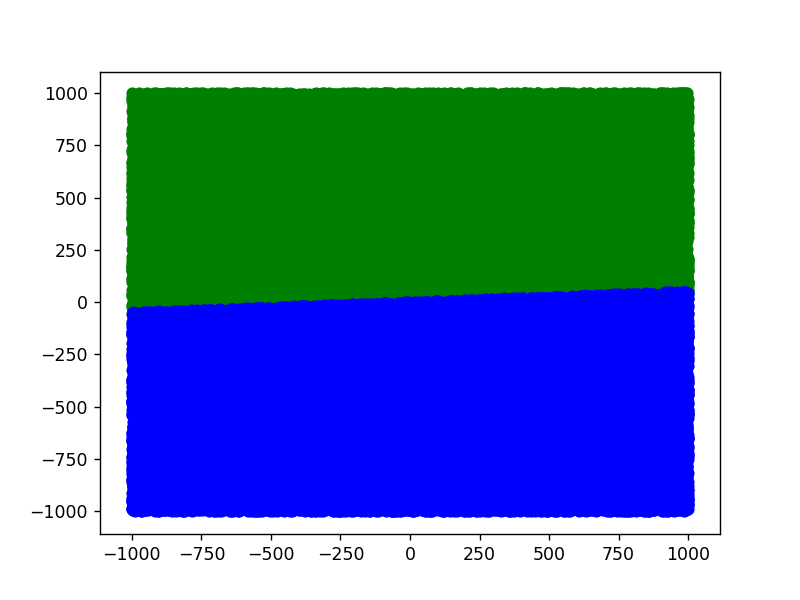

In [69]:
print("Now results for epsilon = 1e-20")
result1 = dividePointsFirst(points1,1e-20)

Now results for epsilon = 1e-20
Method 2: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


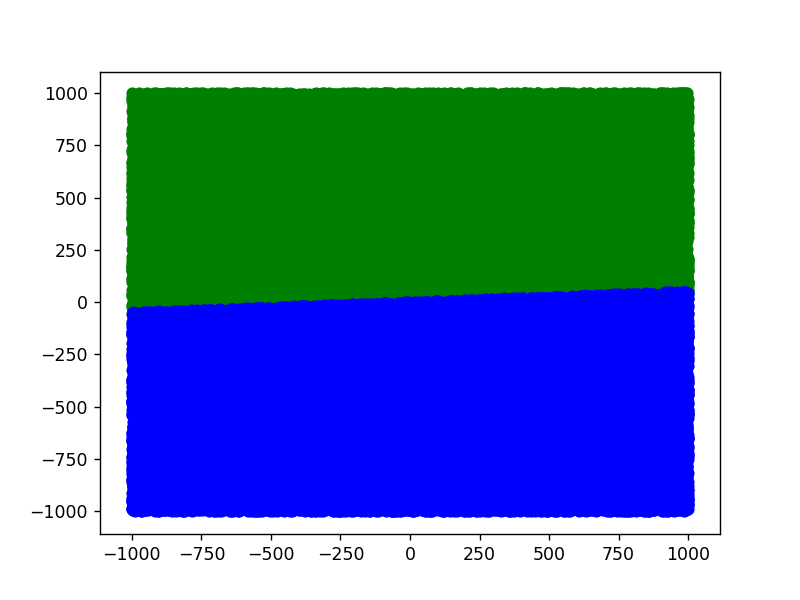

In [70]:
print("Now results for epsilon = 1e-20")
result2 = dividePointsSecond(points1,1e-20)

Now results for epsilon = 1e-20
Method 3: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


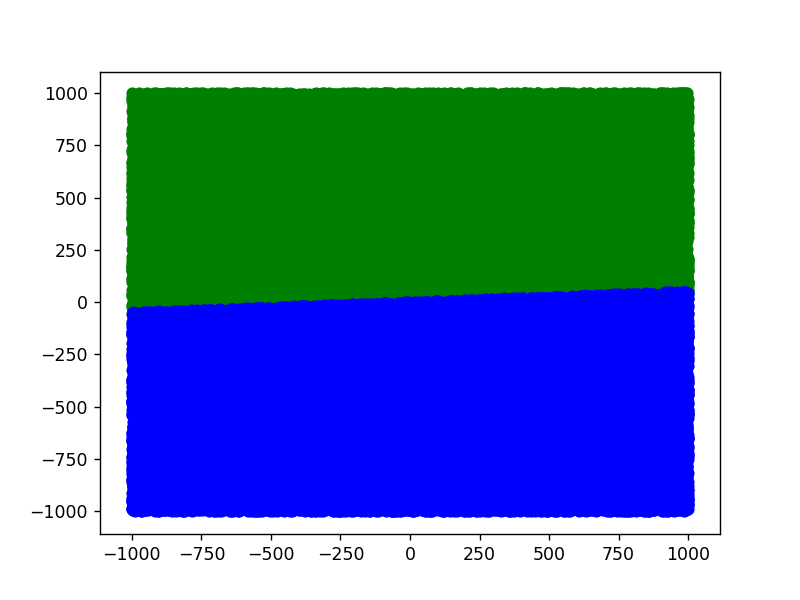

In [31]:
print("Now results for epsilon = 1e-20")
result3 = dividePointsThird(points1,1e-20)

Now results for epsilon = 1e-20
Method 4: The number of points in list LEFT is 50099, in list RIGHT is 49901 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


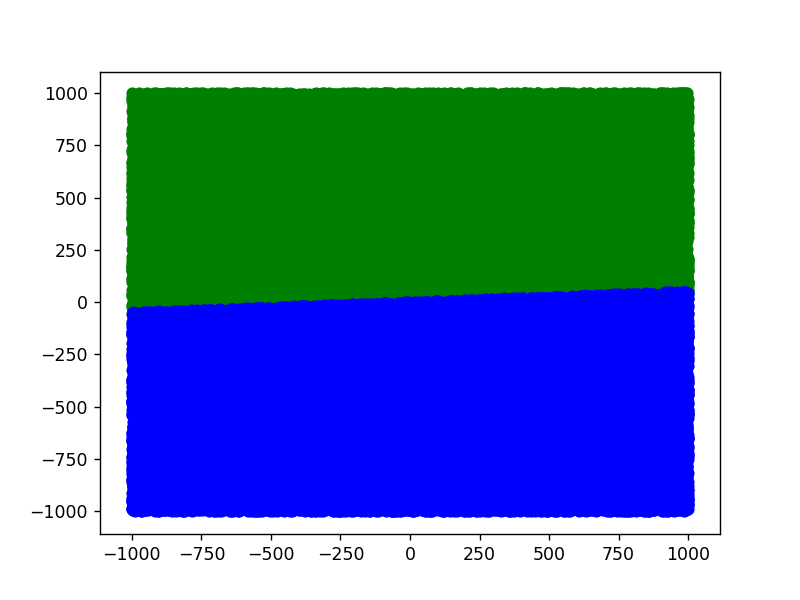

In [32]:
print("Now results for epsilon = 1e-20")
result4 = dividePointsFourth(points1,1e-20)

In [73]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 1e-20
Method 1: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


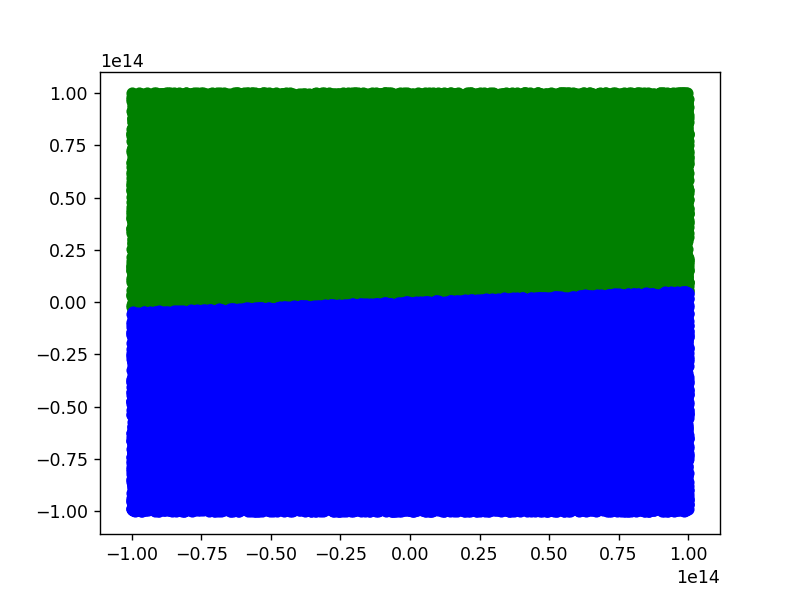

In [74]:
print("Now results for epsilon = 1e-20")
result1 = dividePointsFirst(points2,1e-20)


Now results for epsilon = 1e-20
Method 2: The number of points in list LEFT is 50101, in list RIGHT is 49892 and in list MIDDLE is 7


<IPython.core.display.Javascript object>


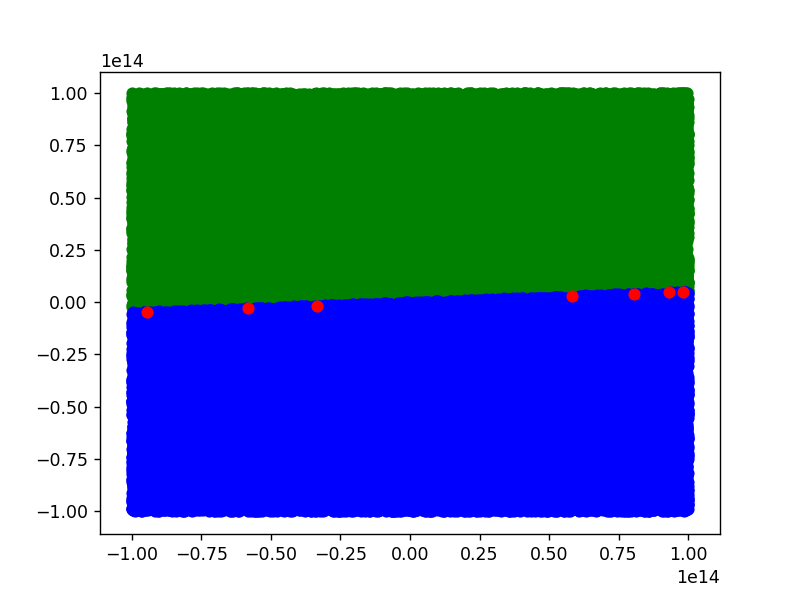

In [75]:
print("Now results for epsilon = 1e-20")
result2 = dividePointsSecond(points2,1e-20)

Now results for epsilon = 1e-20
Method 3: The number of points in list LEFT is 50103, in list RIGHT is 49897 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


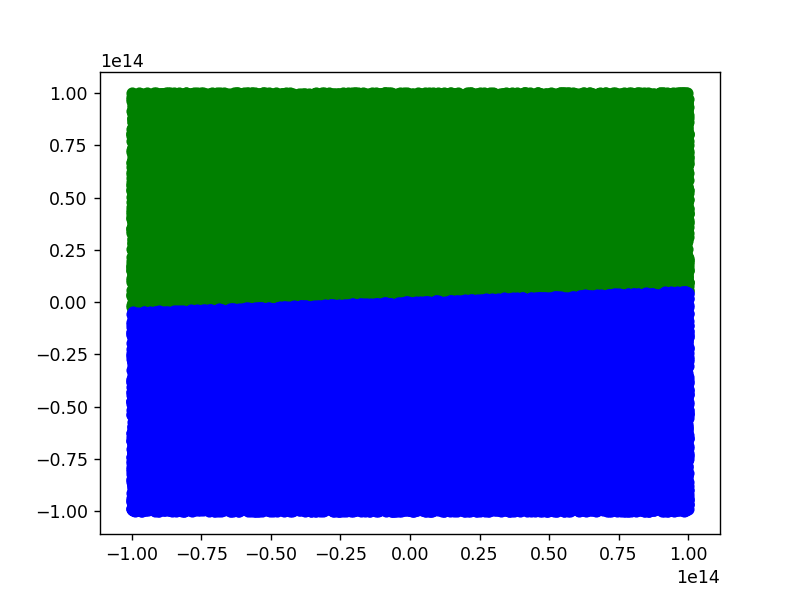

In [33]:
print("Now results for epsilon = 1e-20")
result3 = dividePointsThird(points2,1e-20)

Now results for epsilon = 1e-20
Method 4: The number of points in list LEFT is 50102, in list RIGHT is 49898 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


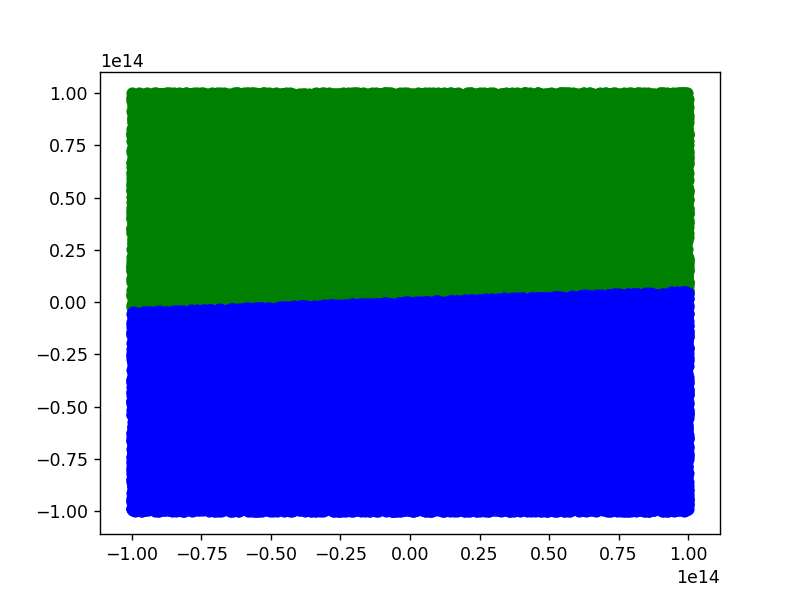

In [34]:
print("Now results for epsilon = 1e-20")
result4 = dividePointsFourth(points2,1e-20)

In [78]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 8 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 5 
The number of points that were placed different between method 2 and method 3 is 8 
The number of points that were placed different between method 2 and method 4 is 8 
The number of points that were placed different between method 3 and method 4 is 5 


Now results for epsilon = 1e-20
Method 1: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


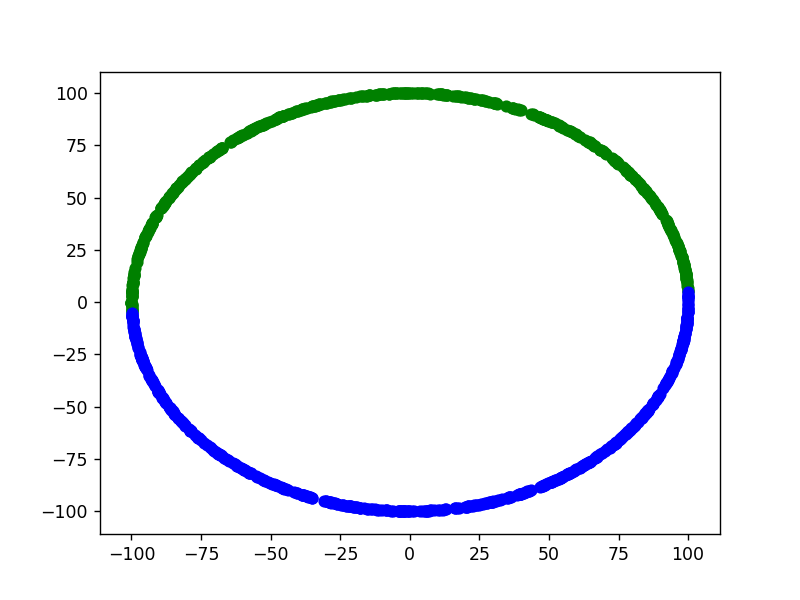

In [79]:
print("Now results for epsilon = 1e-20")
result1 = dividePointsFirst(points3,1e-20)

Now results for epsilon = 1e-20
Method 2: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


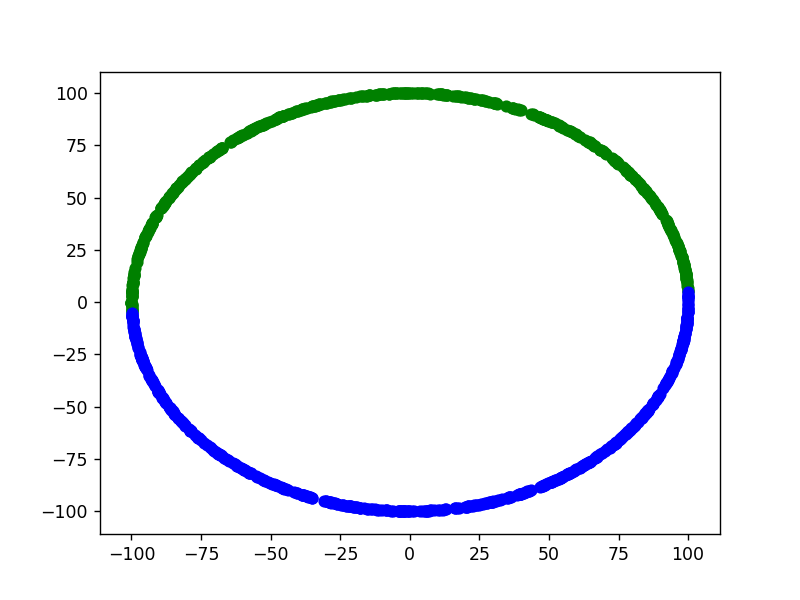

In [84]:
print("Now results for epsilon = 1e-20")
result2 = dividePointsSecond(points3,1e-20)

Now results for epsilon = 1e-20
Method 3: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


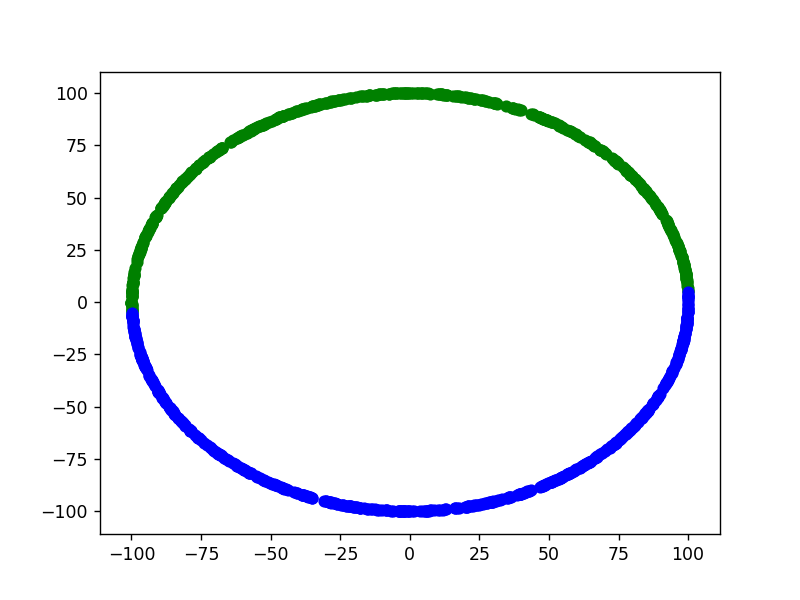

In [41]:
print("Now results for epsilon = 1e-20")
result3 = dividePointsThird(points3,1e-20)

Now results for epsilon = 1e-20
Method 4: The number of points in list LEFT is 476, in list RIGHT is 524 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


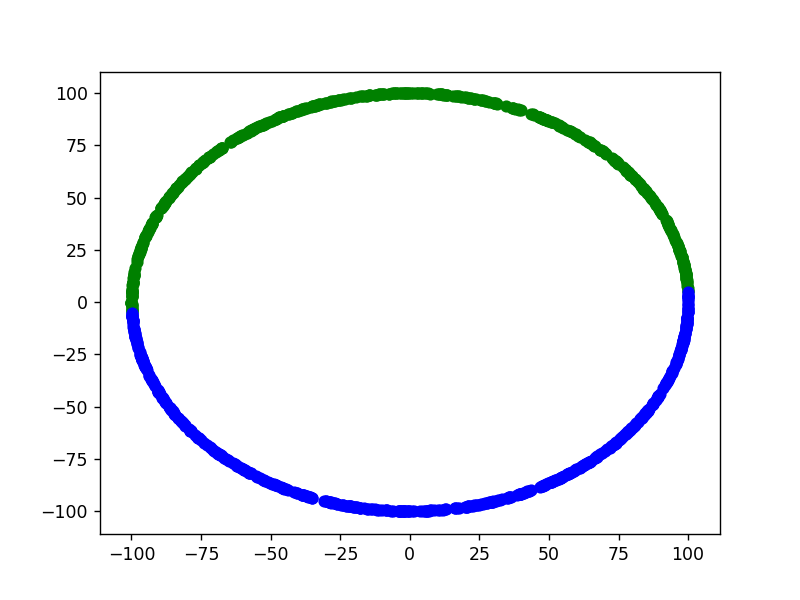

In [40]:
print("Now results for epsilon = 1e-20")
result3 = dividePointsFourth(points3,1e-20)

In [86]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 0 
The number of points that were placed different between method 1 and method 3 is 0 
The number of points that were placed different between method 1 and method 4 is 0 
The number of points that were placed different between method 2 and method 3 is 0 
The number of points that were placed different between method 2 and method 4 is 0 
The number of points that were placed different between method 3 and method 4 is 0 


Now results for epsilon = 1e-20
Method 1: The number of points in list LEFT is 171, in list RIGHT is 402 and in list MIDDLE is 427


<IPython.core.display.Javascript object>


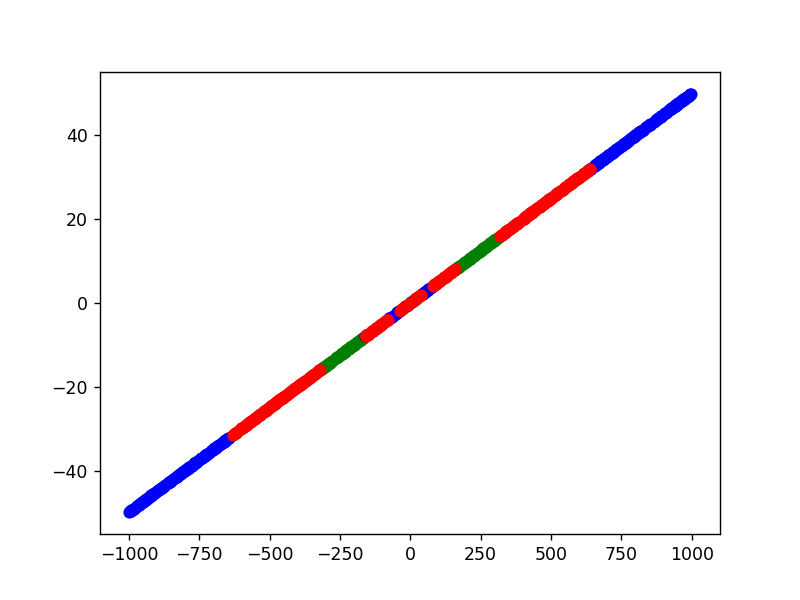

In [87]:
print("Now results for epsilon = 1e-20")
result1 = dividePointsFirst(points4,1e-20)

Now results for epsilon = 1e-20
Method 2: The number of points in list LEFT is 149, in list RIGHT is 158 and in list MIDDLE is 693


<IPython.core.display.Javascript object>


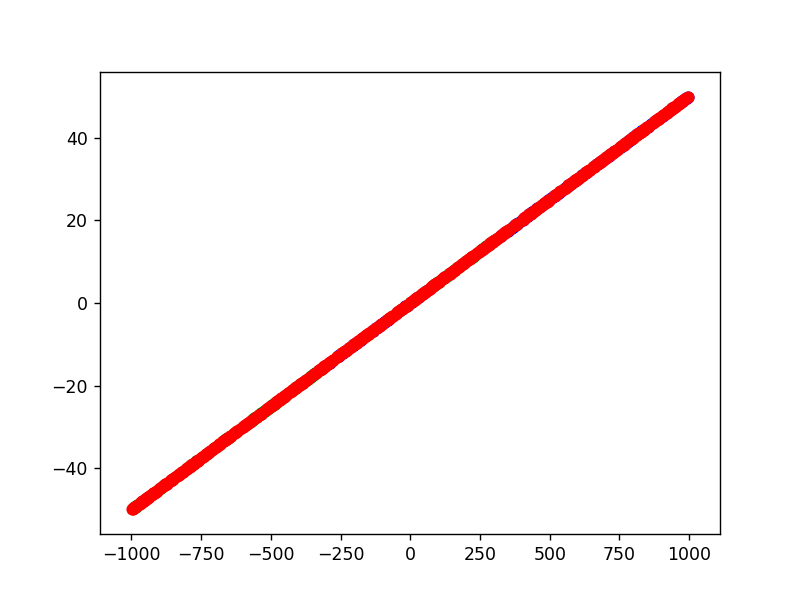

In [88]:
print("Now results for epsilon = 1e-20")
result2 = dividePointsSecond(points4,1e-20)

Now results for epsilon = 1e-20
Method 3: The number of points in list LEFT is 464, in list RIGHT is 534 and in list MIDDLE is 2


<IPython.core.display.Javascript object>


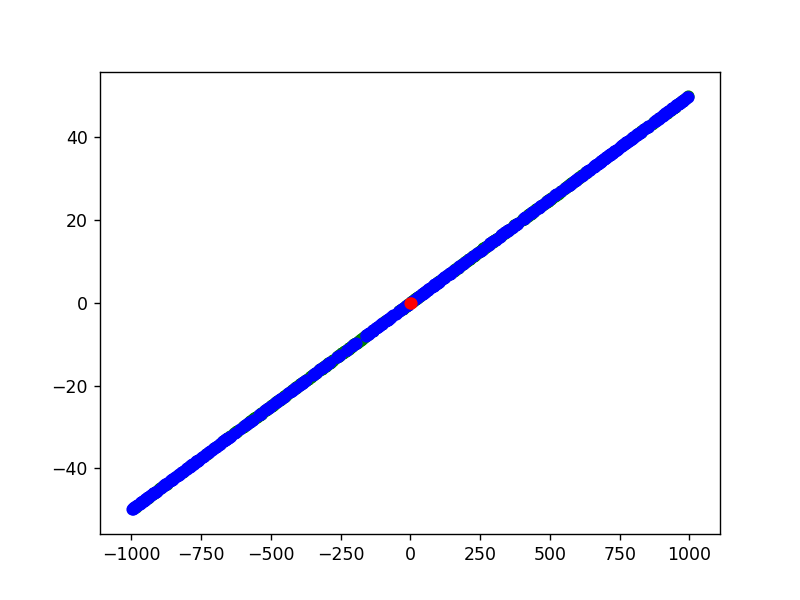

In [39]:
print("Now results for epsilon = 1e-20")
result3 = dividePointsThird(points4,1e-20)

Method 4: The number of points in list LEFT is 481, in list RIGHT is 519 and in list MIDDLE is 0


<IPython.core.display.Javascript object>


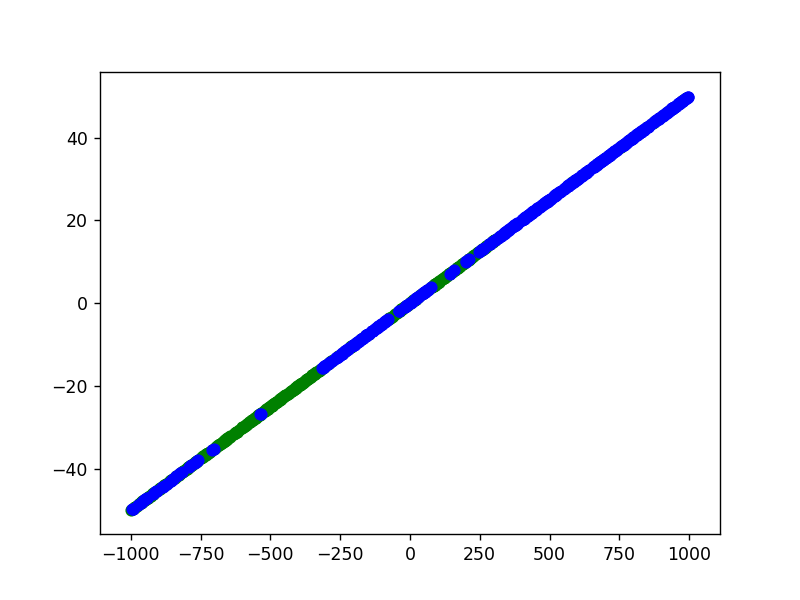

In [38]:
result4 = dividePointsFourth(points4,1e-20)


In [91]:
calculateDiff(result1,result2,1,2)
calculateDiff(result1,result3,1,3)
calculateDiff(result1,result4,1,4)
calculateDiff(result2,result3,2,3)
calculateDiff(result2,result4,2,4)
calculateDiff(result3,result4,3,4)

The number of points that were placed different between method 1 and method 2 is 656 
The number of points that were placed different between method 1 and method 3 is 554 
The number of points that were placed different between method 1 and method 4 is 693 
The number of points that were placed different between method 2 and method 3 is 833 
The number of points that were placed different between method 2 and method 4 is 717 
The number of points that were placed different between method 3 and method 4 is 465 
